<a href="https://colab.research.google.com/github/Thitichaya2000/DWDM21/blob/main/Chap_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-means

Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)


In [3]:
X.shape

(500, 2)

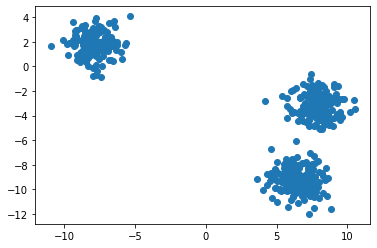

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

##Clustering

###import

In [5]:
from sklearn.cluster import KMeans

###Define

In [15]:
kmeans = KMeans(n_clusters=2, random_state=6)

###Fit-Predict

In [16]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [8]:
y_clust = kmeans.fit_predict(X)

In [9]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

###Plot

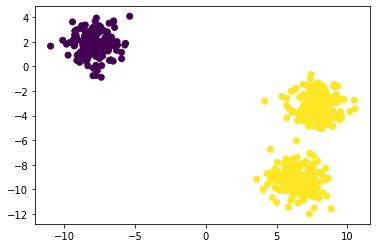

In [10]:
plt.scatter(X[:,0],X[:,1], c=y_clust)

###3 Cluster

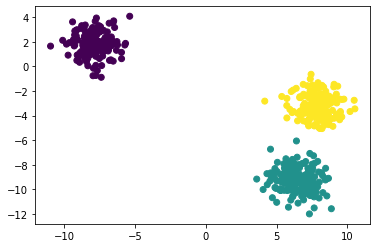

In [11]:
#Define
kmeans = KMeans(n_clusters=3, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)


###4 Cluster

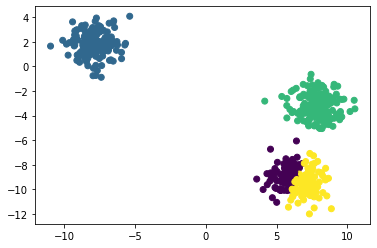

In [12]:
#Define
kmeans = KMeans(n_clusters=4, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

###5 Cluster

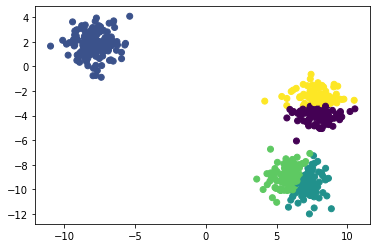

In [13]:
#Define
kmeans = KMeans(n_clusters=5, random_state=14)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

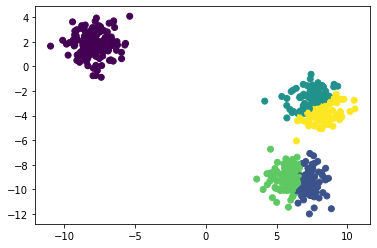

In [14]:
#Define
kmeans = KMeans(n_clusters=5, random_state=6)
#Fit-Predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1], c=y_clust)

#Example Application (Color Quantization)

In [20]:
import cv2
import os

In [33]:
img = cv2.imread('/content/Lin-Yi-10.jpg')

In [34]:
img.shape


(874, 600, 3)

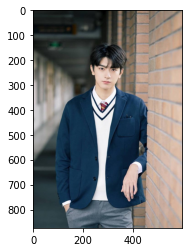

In [35]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

###นับจำนวนสี

In [29]:
import numpy as np

In [36]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(53863, 3)

###จัดกลุ่มสีให้เหลือ 16 สี

In [37]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [38]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(524400, 3)

In [39]:
final_color = myquantize.fit_predict(img_row)

###ใช้ centroid เป็นตัวแทนของสี

In [40]:
centroid = myquantize.cluster_centers_

In [41]:
centroid


array([[131.69340826, 117.32038038, 103.25610547],
       [ 18.50342502,  51.0203896 ,  78.92976025],
       [220.73696551, 192.15944358, 176.2320784 ],
       [152.23182999, 140.84834851, 131.58147701],
       [ 18.06652772,  22.39119077,  23.17610115],
       [239.38963671, 239.05878073, 242.41401175],
       [ 96.1307926 ,  91.45098039,  81.5251588 ],
       [ 36.3651323 ,  42.28188214,  41.09841533],
       [171.04548116, 165.06648448, 163.13429631],
       [ 51.40344301,  62.78695385,  63.7552607 ],
       [ 10.79909807,  35.69393924,  59.96528569],
       [203.53533538, 175.53160352, 159.38738985],
       [102.3472946 , 117.04593708, 130.21199254],
       [197.90249254, 191.58166882, 192.17734766],
       [187.89473033, 158.06563109, 139.18036947],
       [ 61.62036016,  85.21572951, 104.83733921]])

แทนสีคืนลงไป

In [42]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

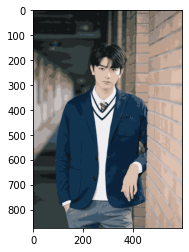

In [43]:
plt.imshow(new_img/255)

In [44]:
plt.imsave('img.jpg',new_img/255)

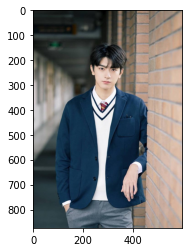

In [45]:
plt.imshow(RGB_img)